In [1]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from skimage.metrics import peak_signal_noise_ratio as compare_psnr

In [2]:
target = 'logistic'

In [3]:
results = []
for trial in os.listdir('.'):
    if trial.split('_')[0] == target:
        results.append(trial)
        
results.sort()

def load_trained(path):
    noise = np.load(os.path.join(path, 'noise.npy'))
    noisy = np.load(os.path.join(path, 'noisy.npy'))
    original = np.load(os.path.join(path, 'original.npy'))
    residual_curve = np.load(os.path.join(path, 'residual_curve.npy'))
    
    return noise, noisy, original, residual_curve

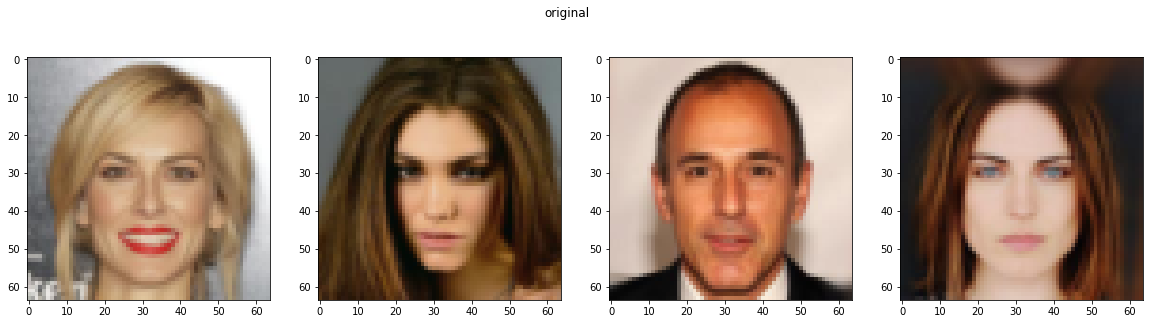

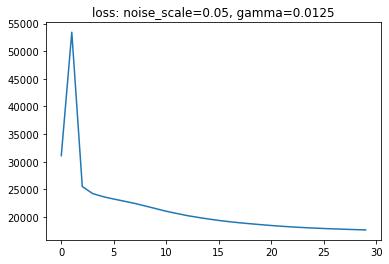

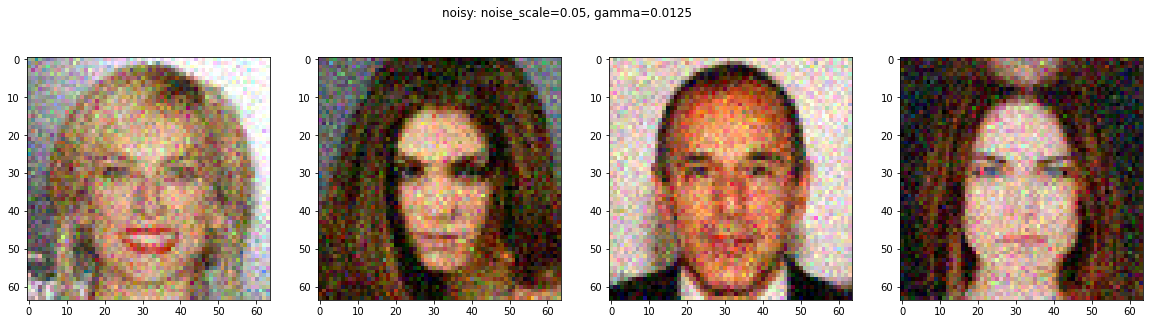

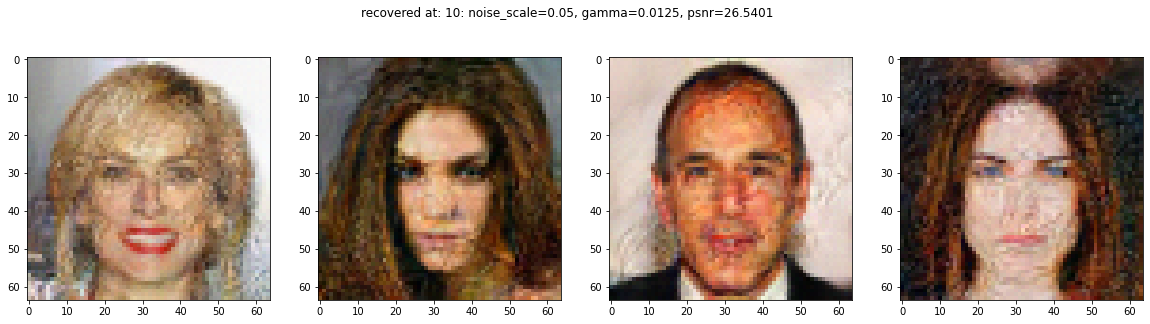

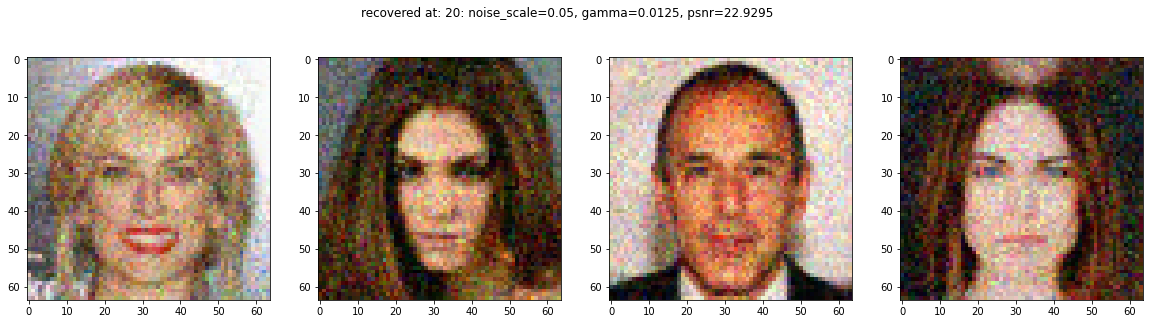

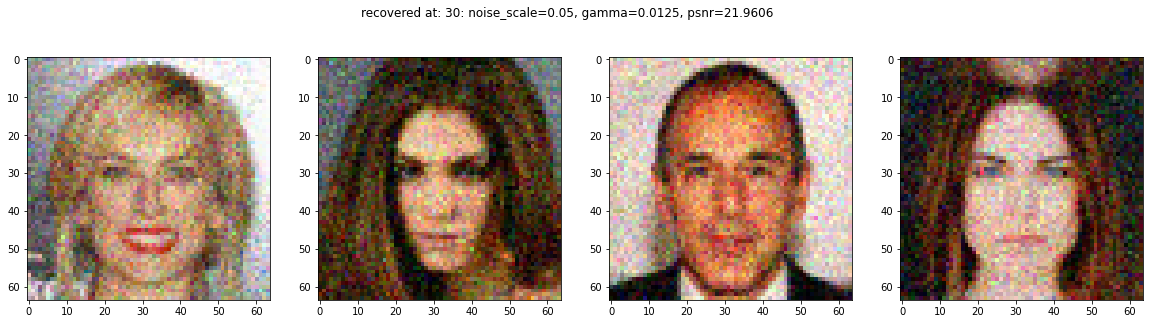

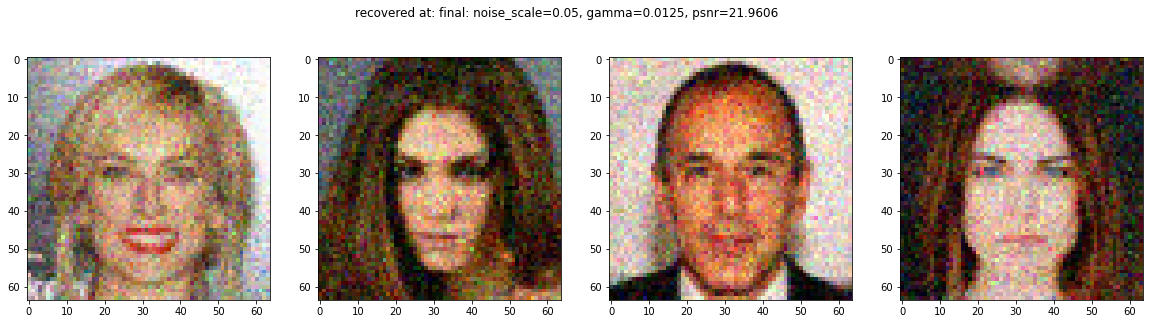

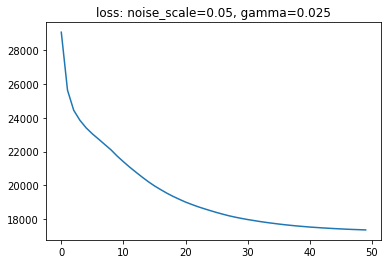

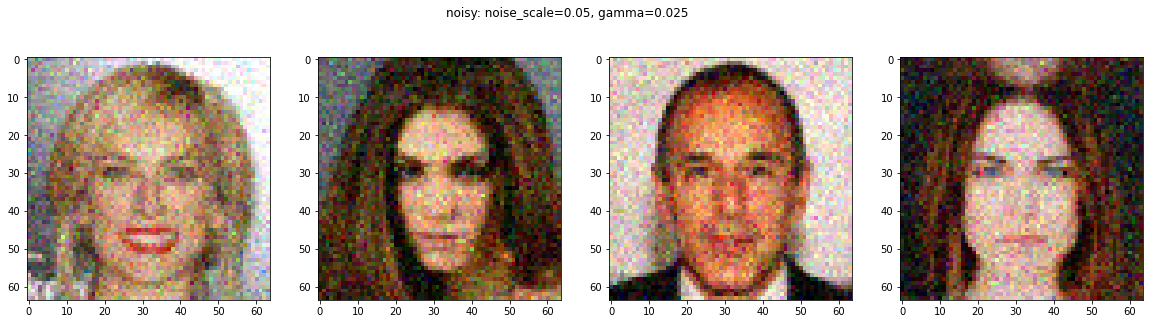

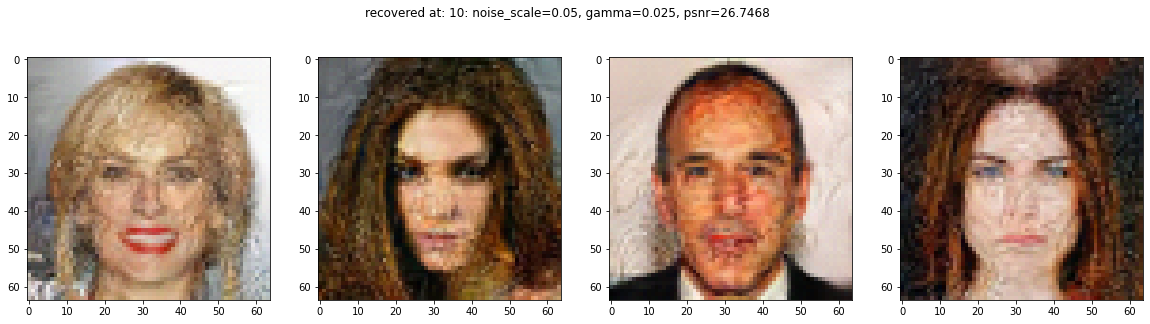

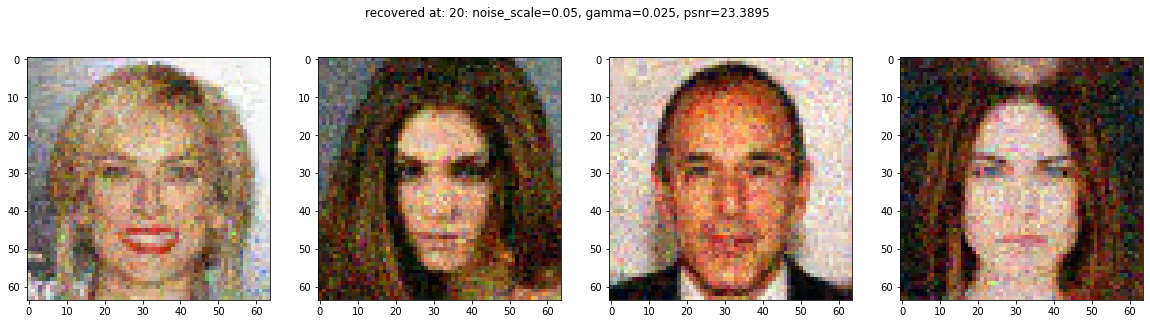

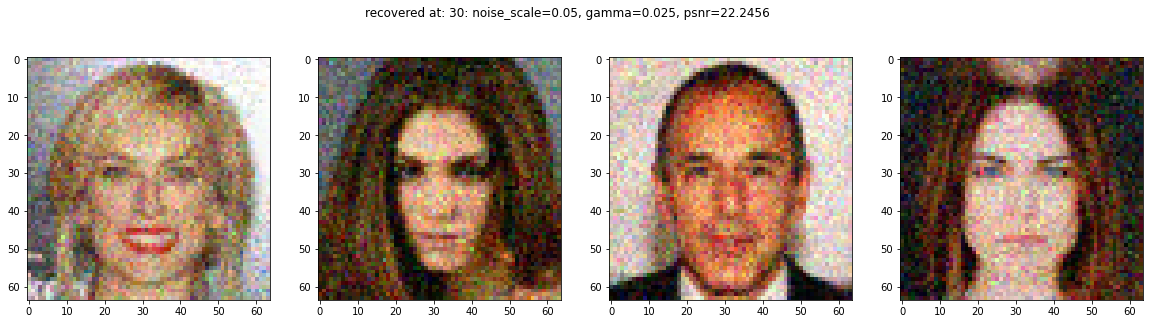

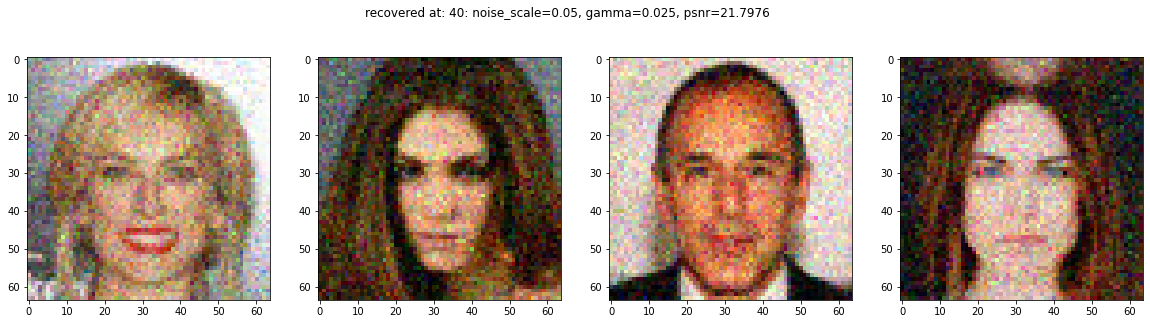

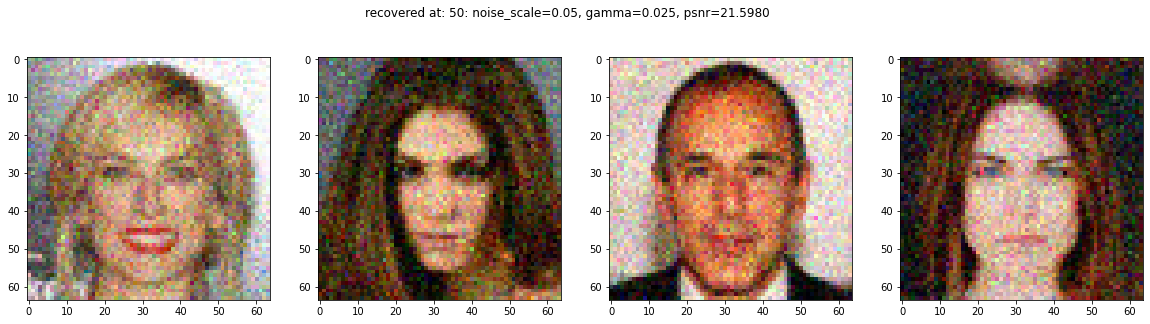

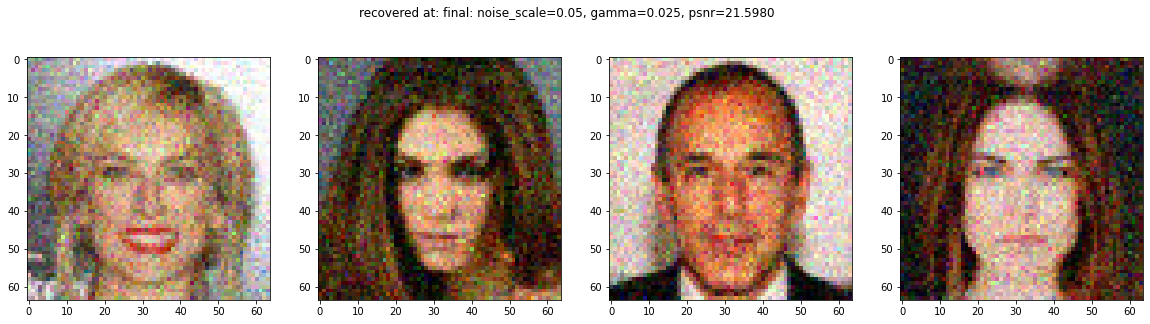

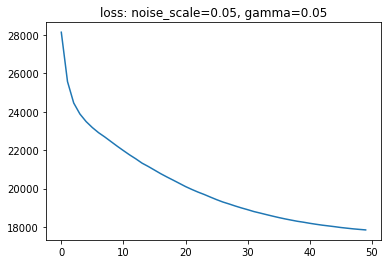

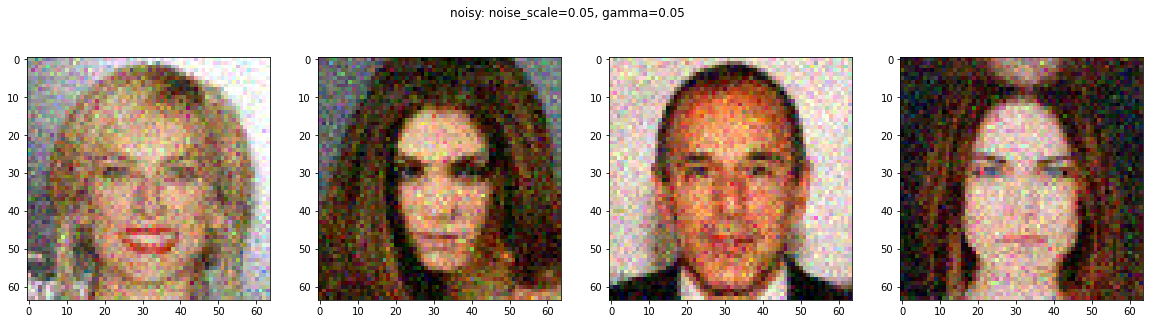

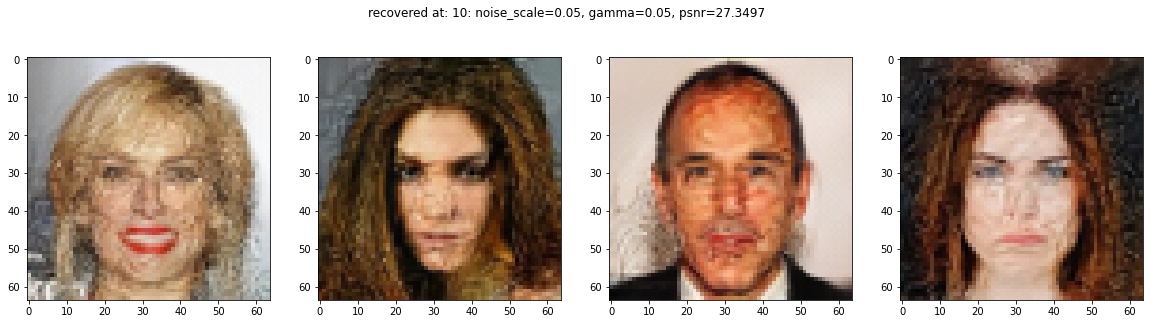

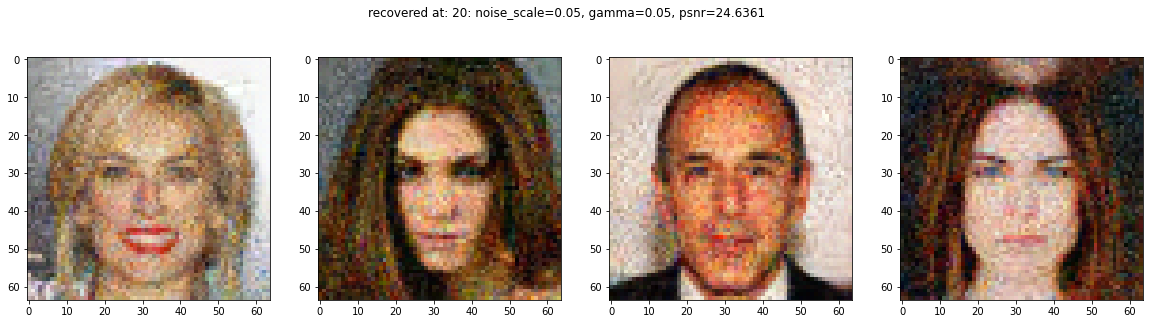

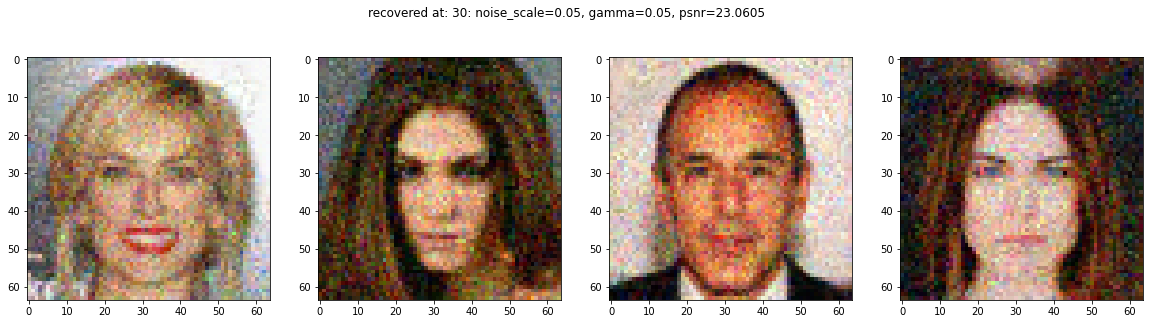

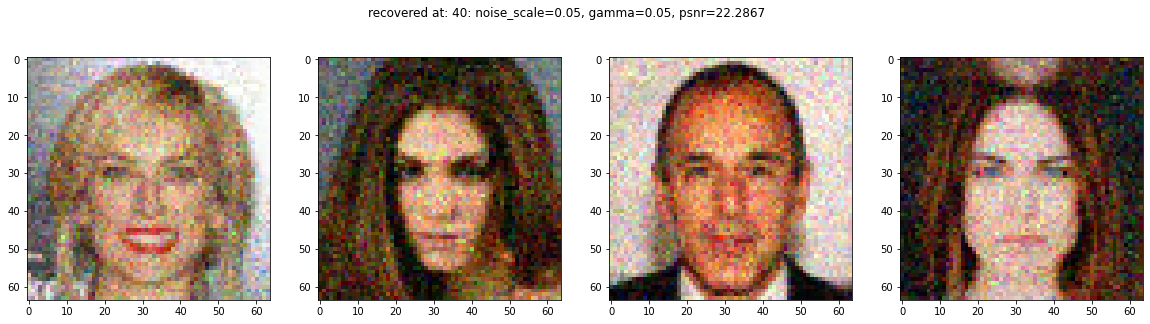

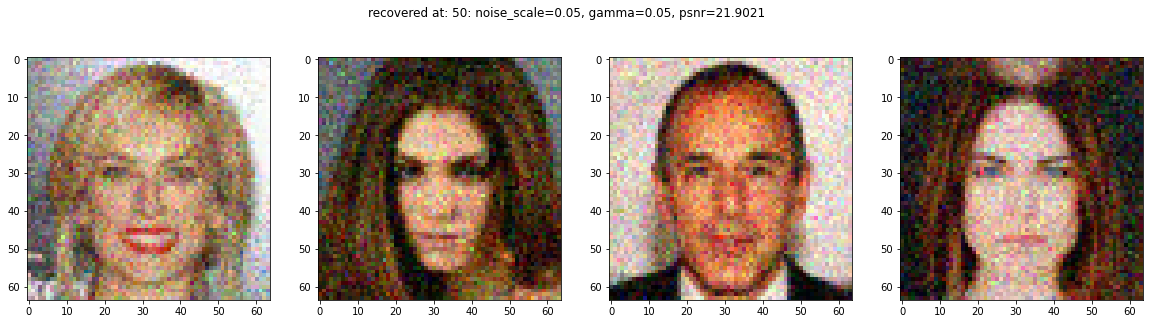

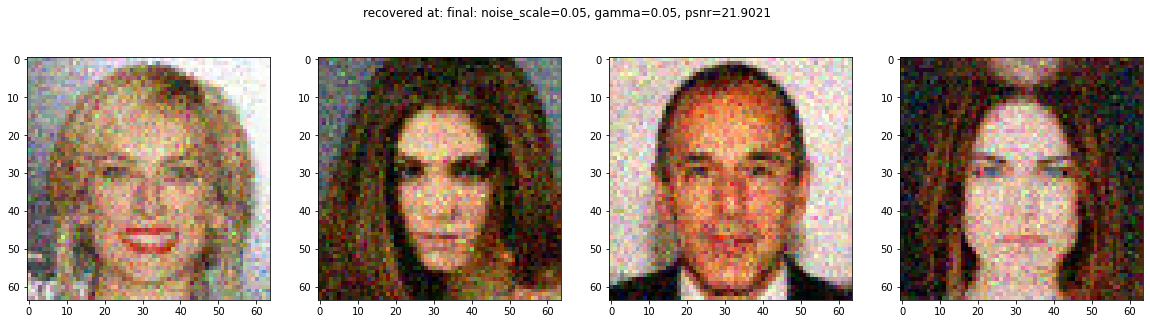

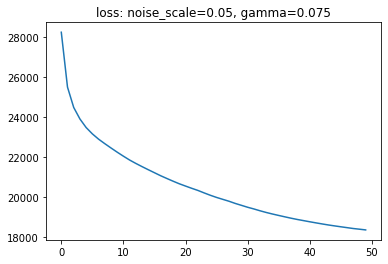

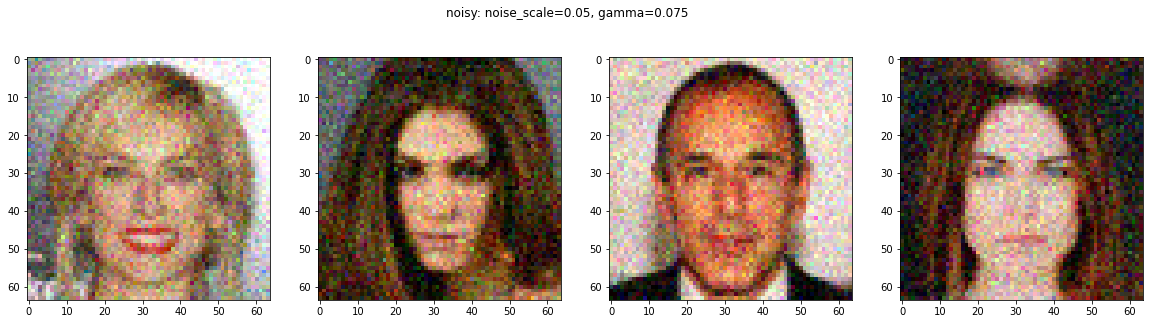

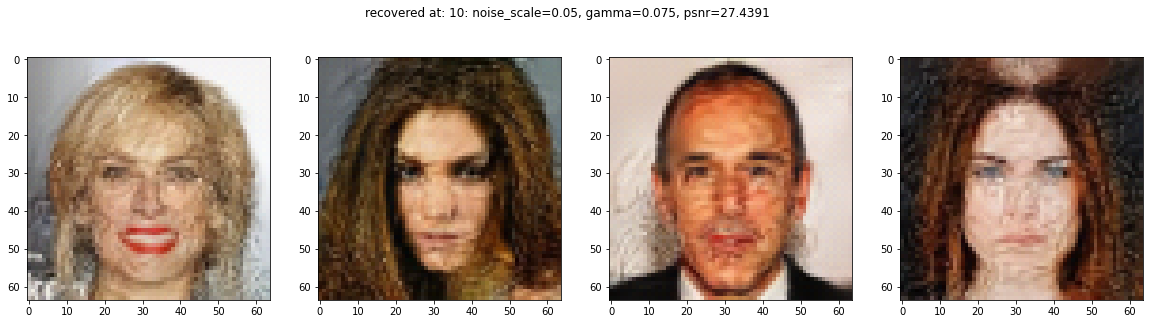

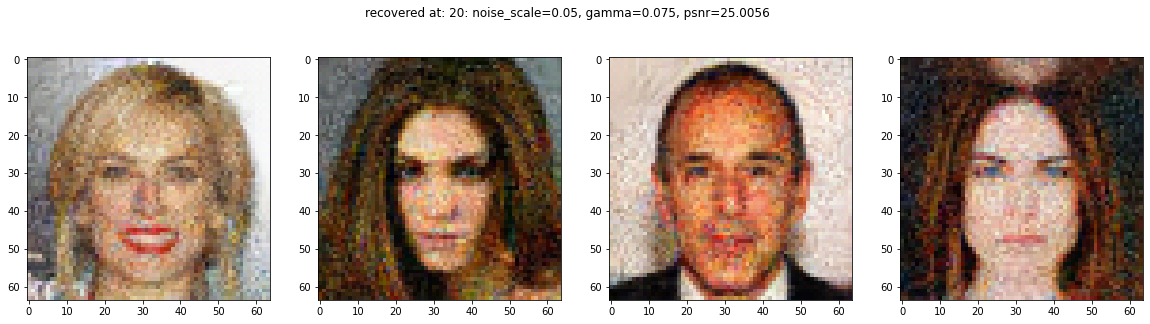

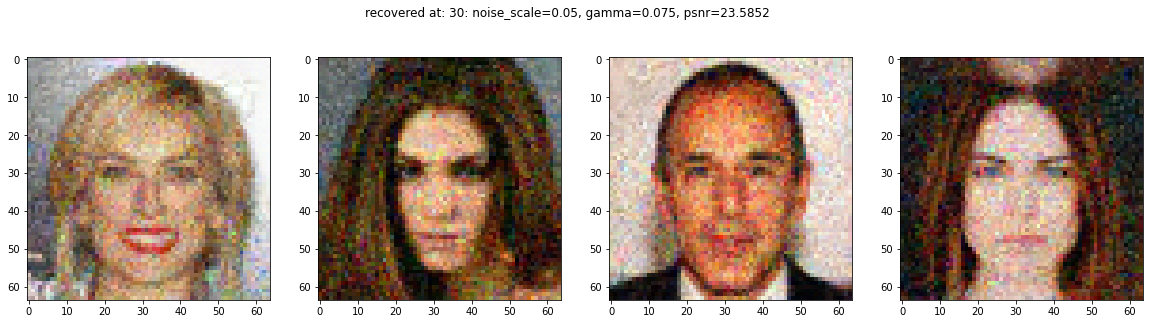

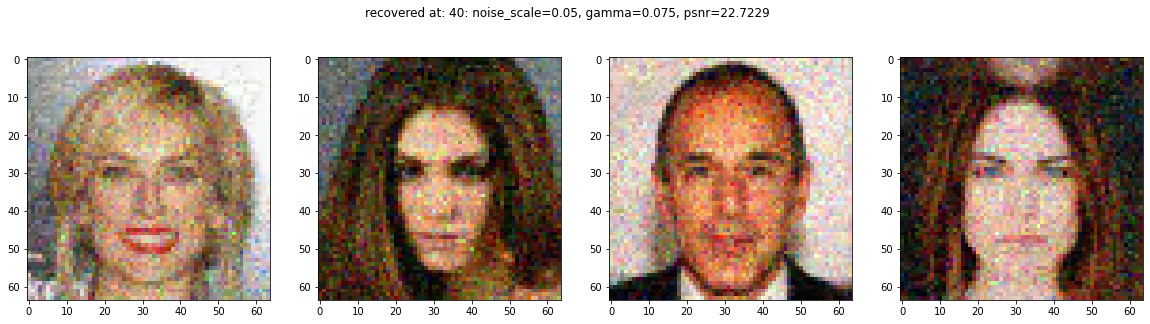

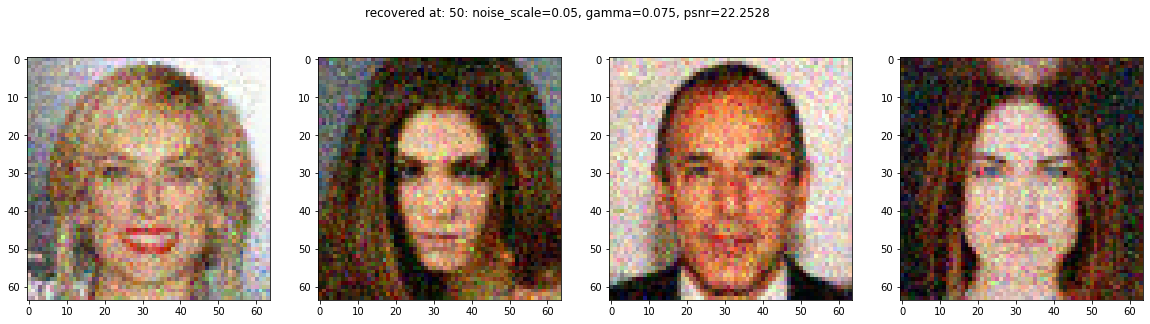

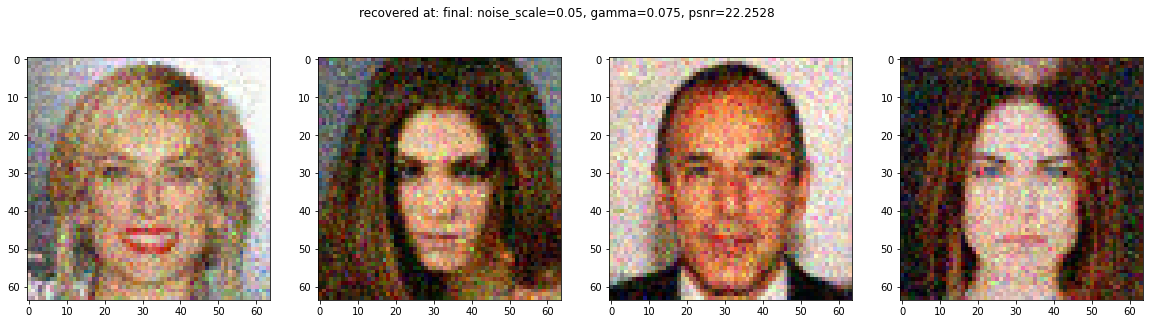

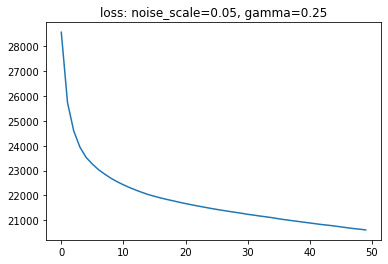

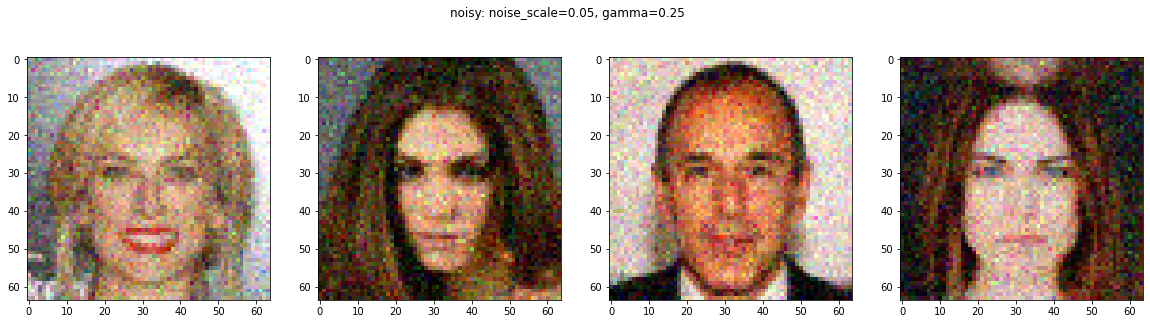

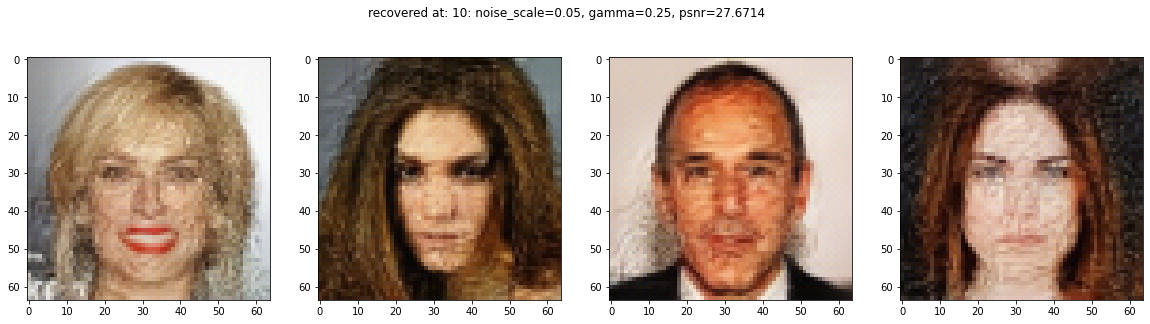

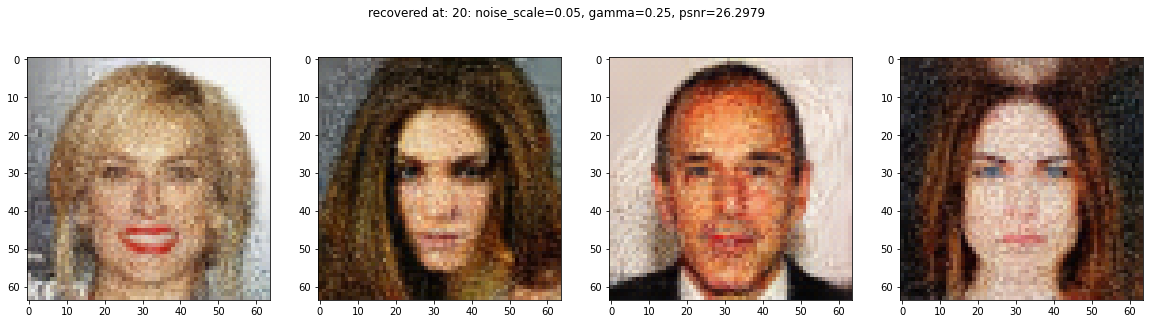

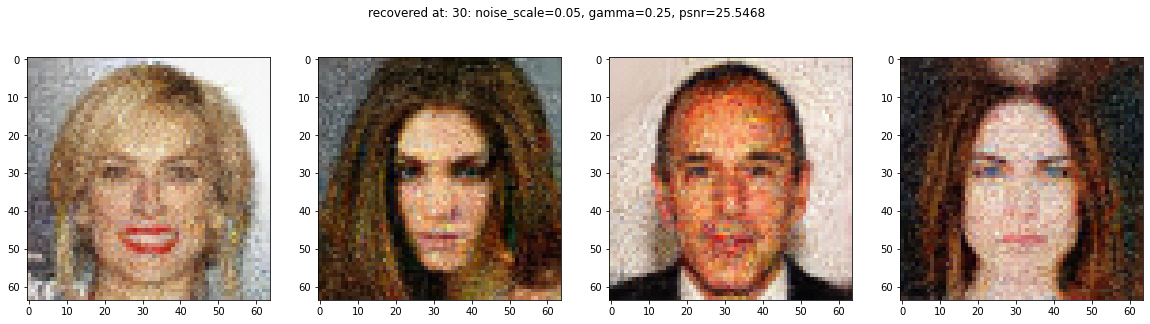

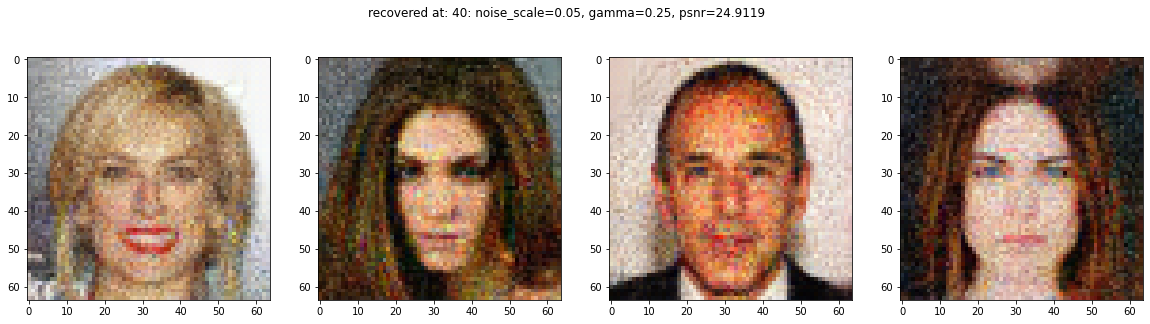

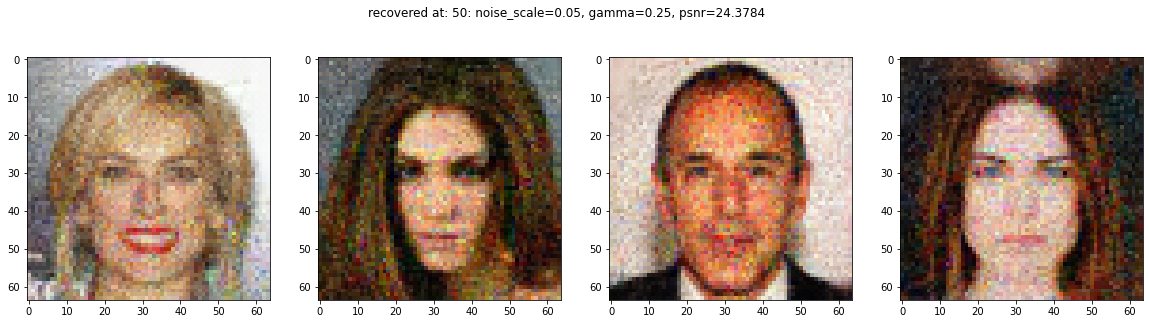

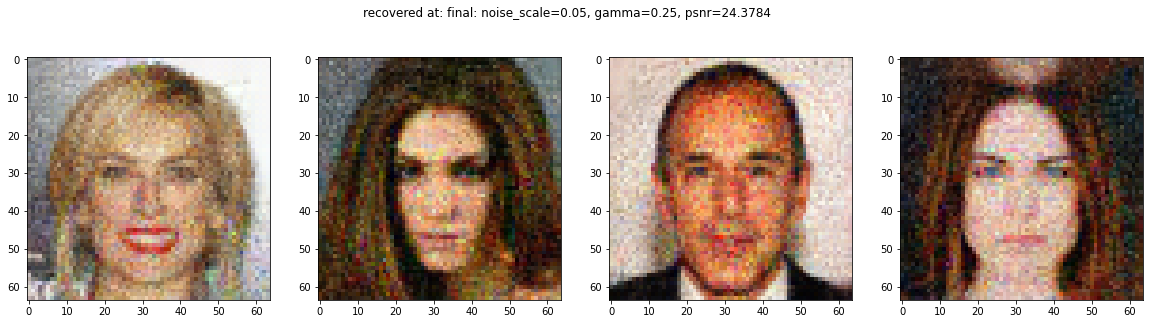

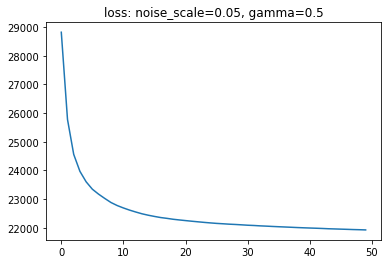

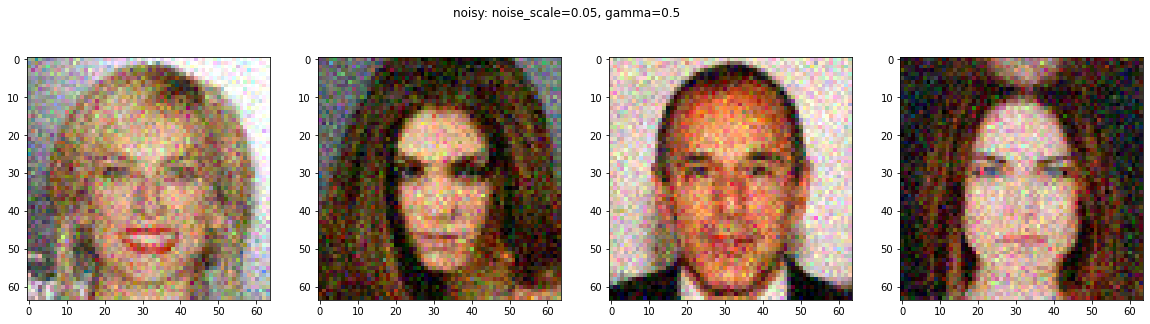

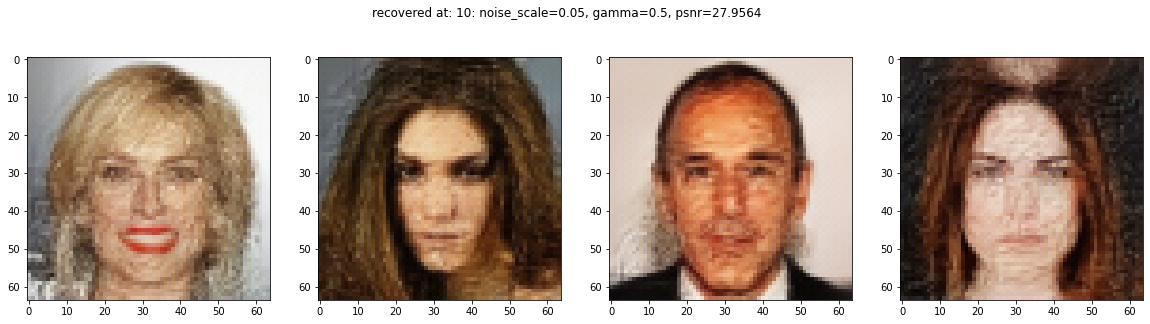

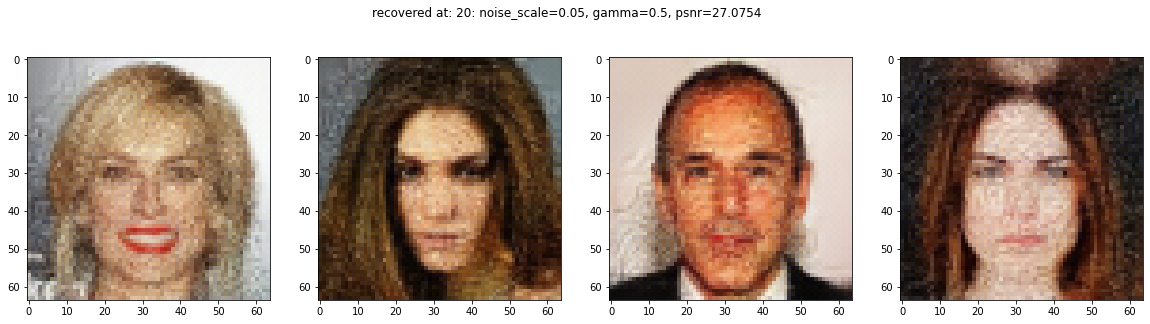

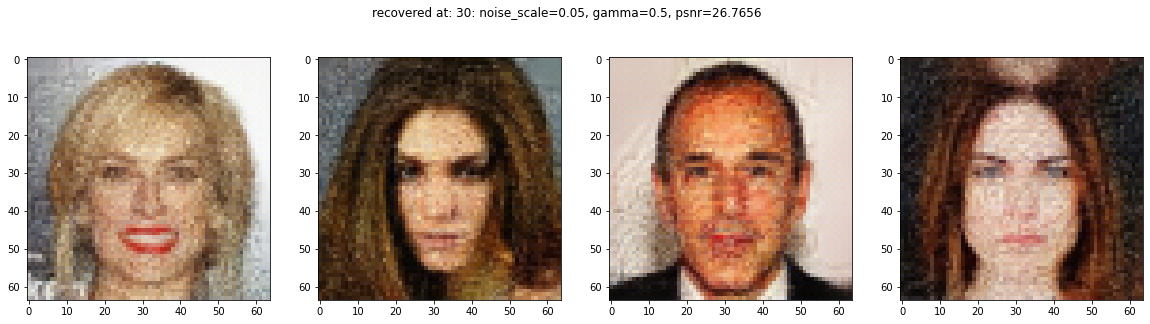

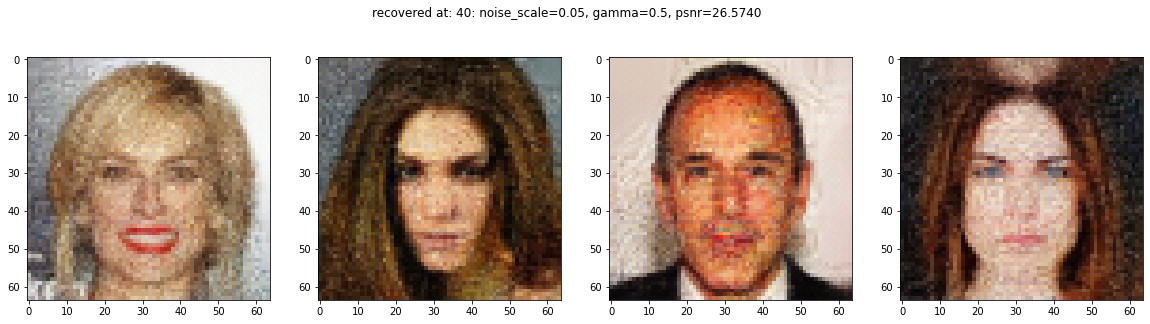

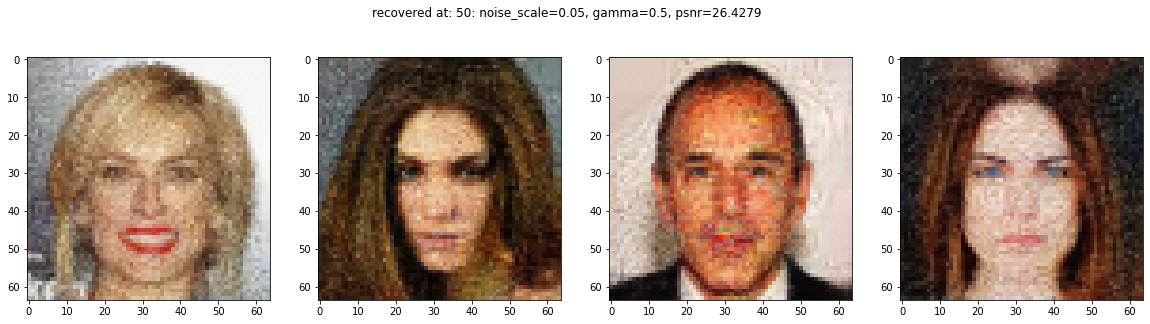

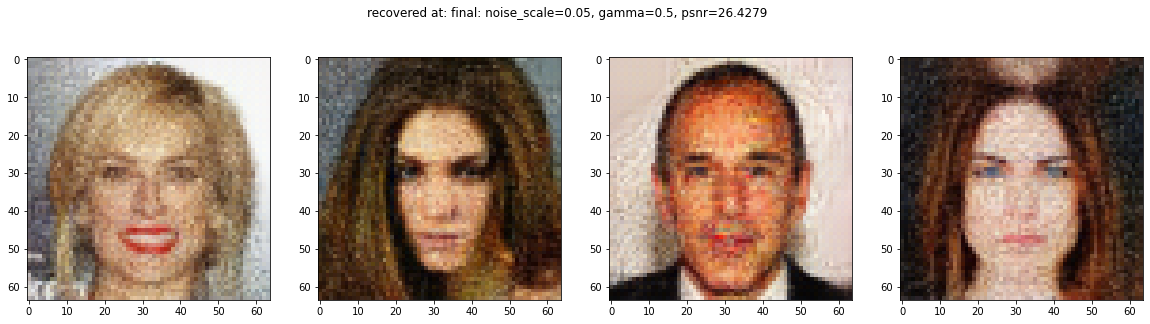

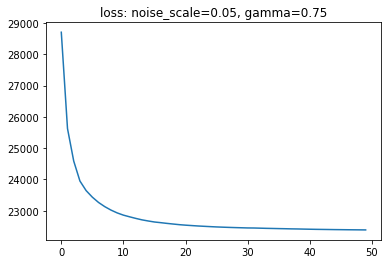

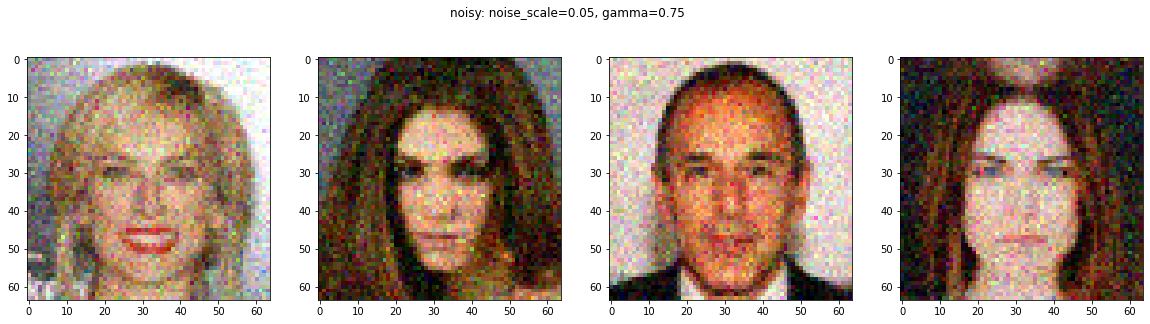

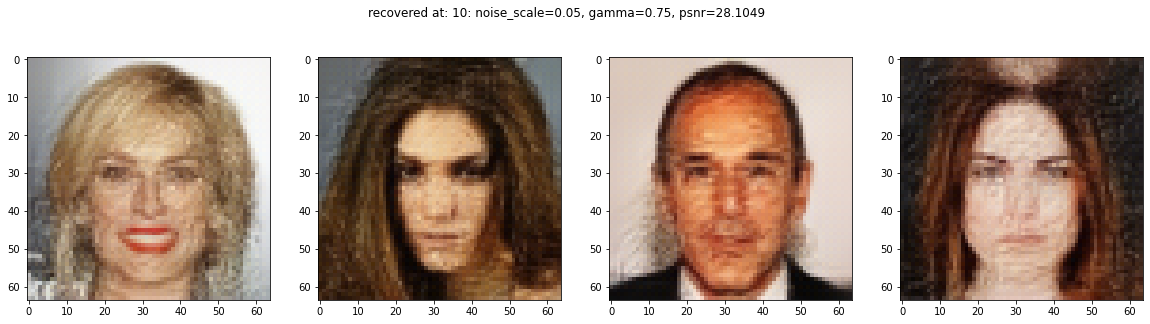

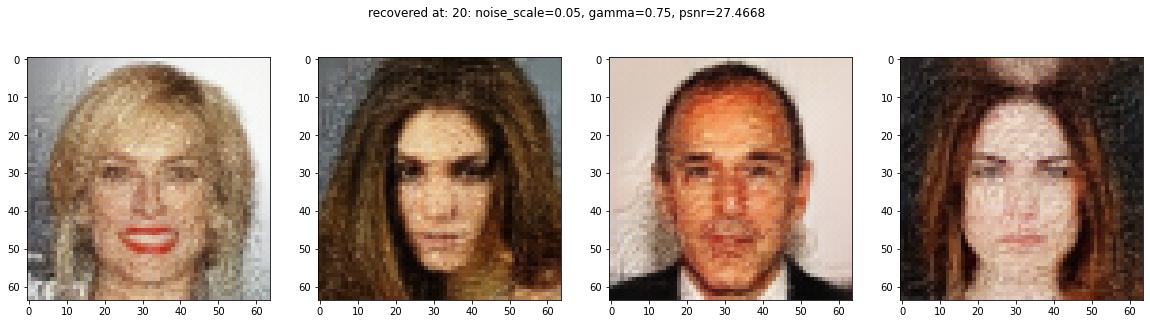

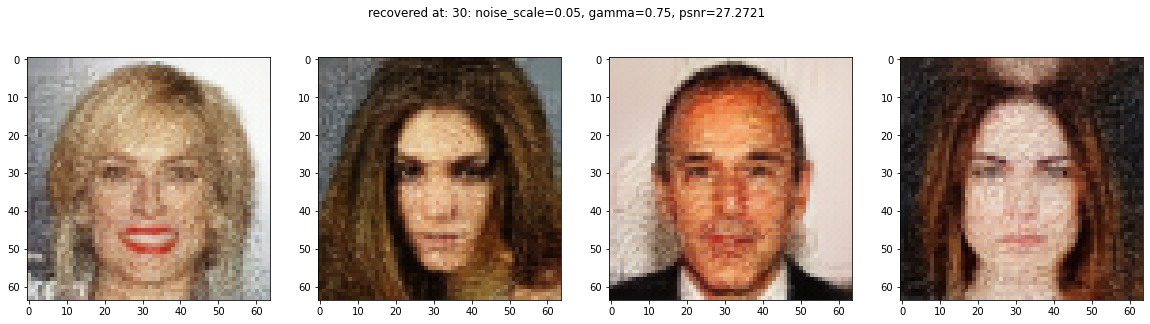

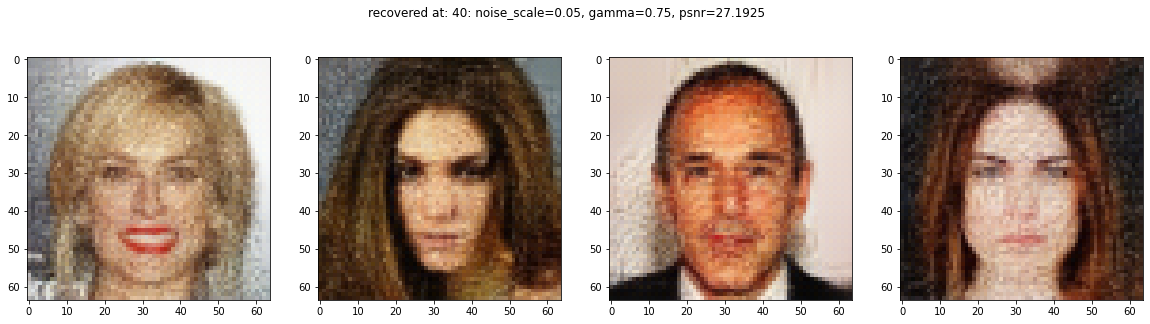

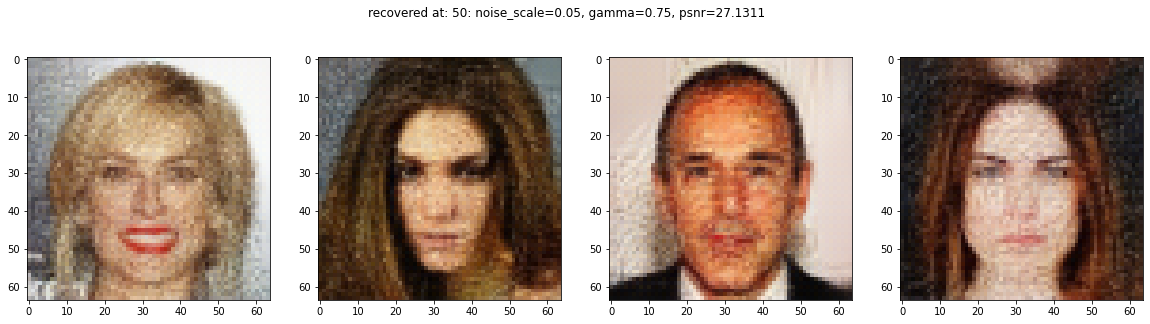

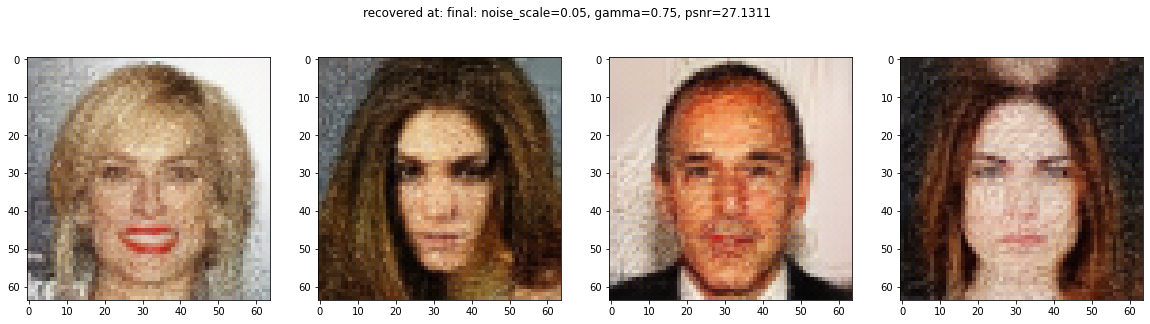

In [4]:
original_showed = False
for trial in results:
    recovered_cps = [str(x) for x in Path(trial).glob("**/recovered_*.npy")]
    gamma = trial.split('_')[5]
    if len(recovered_cps) > 0:
        noise_info = trial.split('_')[1]
        noise_loc, noise_scale = noise_info.split('#')
        noise, noisy, original, residual_curve = load_trained(trial)
        
        if not original_showed:
            fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
            for ori, ax in zip(original, axes):
                ax.imshow(ori.transpose(0, 1, 2))
            _ = plt.suptitle(f'original')
            _ = plt.show()
            original_showed = True

        _ = plt.plot(residual_curve)
        _ = plt.title(f'loss: noise_scale={noise_scale}, gamma={gamma}')
        _ = plt.show()

        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
        for noisy, ax in zip(noisy, axes):
            ax.imshow(noisy.transpose(0, 1, 2))
        _ = plt.suptitle(f'noisy: noise_scale={noise_scale}, gamma={gamma}')
        _ = plt.show()
    
        recovered_cps.sort()
        for recovered in recovered_cps:
            checkpoints = recovered.split('_')[-1].replace('.npy', '')
            recovered = np.load(recovered)
            
            psnr = [compare_psnr(x, y) for x,y in zip(original, recovered)]
            fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
            for recover, ax in zip(recovered, axes):
                ax.imshow(recover.transpose(0, 1, 2))
            _ = plt.suptitle(f'recovered at: {checkpoints}: noise_scale={noise_scale}, gamma={gamma}, psnr={np.mean(psnr):.4f}')
            _ = plt.show()
    